### 1. LeNet-5模型 (1998)
LeNet-5模型是Yann LeCun教授于1998年在论文Gradient-based learning applied to document recognition中提出的，它是第一个成功应用于数字识别问题的卷积神经网络。LeNet-5模型一共有7层，下图展示了LeNet-5模型的架构：
#### 网络结构

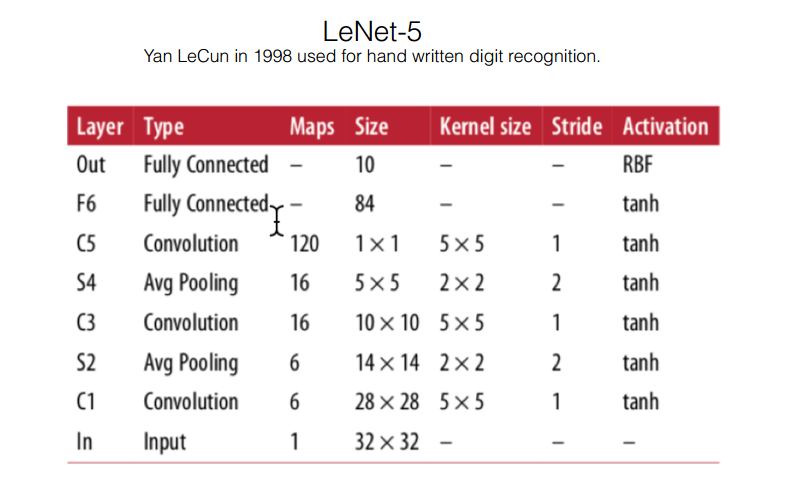

-------------------------------------------------------------------------------------------------

### 2. AlexNet (2012)
#### 网络结构 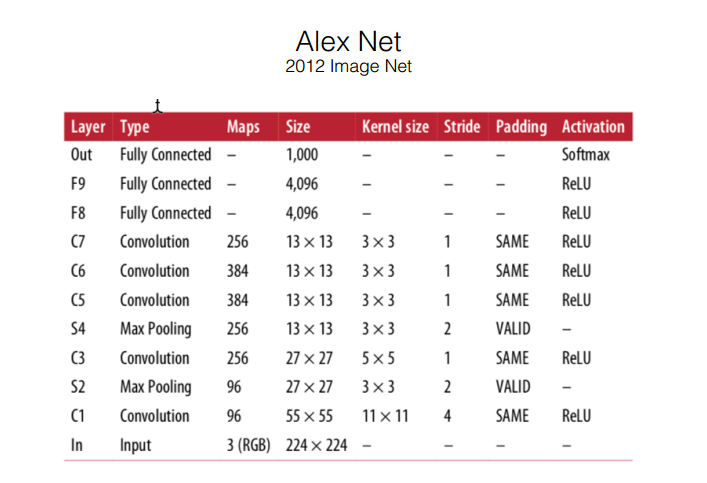
AlexNet是在LeNet的基础上加深了网络的结构，学习更丰富更高维的图像特征。AlexNet的特点：
- 更深的网络结构
- 使用层叠的卷积层，即卷积层+卷积层+池化层来提取图像的特征
- 使用Dropout抑制过拟合
- 使用数据增强Data Augmentation抑制过拟合
- 使用Relu替换之前的sigmoid的作为激活函数
- 多GPU训练

#### 新技术：
#### 1. 数据增强
神经网络由于训练的参数多，表能能力强，所以需要比较多的数据量，不然很容易过拟合。当训练数据有限时，可以通过一些变换从已有的训练数据集中生成一些新的数据，以快速地扩充训练数据。对于图像数据集来说，可以对图像进行一些形变操作：

- 翻转
- 随机裁剪
- 平移，颜色光照的变换
- ...

AlexNet中对数据做了以下操作：

- 1.随机裁剪，对256×256的图片进行随机裁剪到227×227，然后进行水平翻转。
- 2.测试的时候，对左上、右上、左下、右下、中间分别做了5次裁剪，然后翻转，共10个裁剪，之后对结果求平均。
- 3.对RGB空间做PCA（主成分分析），然后对主成分做一个（0, 0.1）的高斯扰动，也就是对颜色、光照作变换，结果使错误率又下降了1%。

#### 2. 层叠池化
此前CNN中普遍使用平均池化，AlexNet全部使用最大池化，避免平均池化的模糊化效果。

在LeNet中池化是不重叠的，即池化的窗口的大小和步长是相等的。

在AlexNet中使用的池化（Pooling）却是可重叠的，也就是说，在池化的时候，每次移动的步长小于池化的窗口长度。AlexNet池化的大小为3×3的正方形，每次池化移动步长为2，这样就会出现重叠。重叠池化可以避免过拟合，这个策略贡献了0.3%的Top-5错误率。与非重叠方案s=2，z=2相比，输出的维度是相等的，并且能在一定程度上抑制过拟合。

#### 3. ReLU
#### 4. dropout
#### 5.局部响应归一化（https://www.jianshu.com/p/c014f81242e7)
提出了LRN层，对局部神经元的活动创建竞争机制，使得其中响应比较大的值变得相对更大，并抑制其他反馈较小的神经元，增强了模型的泛化能力。

#### 网络结构

网络包含8个带权重的层；前5层是卷积层，剩下的3层是全连接层。最后一层全连接层的输出是1000维softmax的输入，softmax会产生1000类标签的分布。

- 卷积层C1

    该层的处理流程是： 卷积-->ReLU-->池化-->归一化。
    
    - 卷积，输入是224×224，使用96个11×11×4的卷积核，得到的FeatureMap为55×55×96。
    - ReLU，将卷积层输出的FeatureMap输入到ReLU函数中。
    - 池化，使用3×3步长为2的池化单元（重叠池化，步长小于池化单元的宽度），输出为27×27×96（(55−3)/2+1=27)
    - 局部响应归一化，使用k=2,n=5,α=10−4,β=0.75进行局部归一化，输出的仍然为27×27×96，输出分为两组，每组的大小为27×27×48
- 卷积层C2
    
    该层的处理流程是：卷积-->ReLU-->池化-->归一化
    - 卷积，输入是2组27×27×48。使用2组，每组128个尺寸为5×5×48的卷积核，并作了边缘填充padding=2，卷积的步长为1. 则输出的FeatureMap为2组，每组的大小为27×27 times128. （(27+2∗2−5)/1+1=27）
    - ReLU，将卷积层输出的FeatureMap输入到ReLU函数中
    - 池化运算的尺寸为3×3，步长为2，池化后图像的尺寸为(27−3)/2+1=13，输出为13×13×256
    - 局部响应归一化，使用k=2,n=5,α=10−4,β=0.75进行局部归一化，输出的仍然为13×13×256，输出分为2组，每组的大小为13×13×128
- 卷积层C3
    该层的处理流程是： 卷积-->ReLU
    - 卷积，输入是13×13×256，使用2组共384尺寸为3×3×256的卷积核，做了边缘填充padding=1，卷积的步长为1.则输出的FeatureMap为13×13 times384
    - ReLU，将卷积层输出的FeatureMap输入到ReLU函数中
- 卷积层C4
    该层的处理流程是： 卷积-->ReLU
    该层和C3类似。
    - 卷积，输入是13×13×384，分为两组，每组为13×13×192.使用2组，每组192个尺寸为3×3×192的卷积核，做了边缘填充padding=1，卷积的步长为1.则输出的FeatureMap为13×13 times384，分为两组，每组为13×13×192
    - ReLU，将卷积层输出的FeatureMap输入到ReLU函数中
- 卷积层C5
    该层处理流程为：卷积-->ReLU-->池化
    - 卷积，输入为13×13×384，分为两组，每组为13×13×192。使用2组，每组为128尺寸为3×3×192的卷积核，做了边缘填充padding=1，卷积的步长为1.则输出的FeatureMap为13×13×256
    - ReLU，将卷积层输出的FeatureMap输入到ReLU函数中
    - 池化，池化运算的尺寸为3×3，步长为2，池化后图像的尺寸为 (13−3)/2+1=6,即池化后的输出为6×6×256
- 全连接层FC6
    该层的流程为：（卷积）全连接 -->ReLU -->Dropout
    - 卷积->全连接： 输入为6×6×256,该层有4096个卷积核，每个卷积核的大小为6×6×256。由于卷积核的尺寸刚好与待处理特征图（输入）的尺寸相同，即卷积核中的每个系数只与特征图（输入）尺寸的一个像素值相乘，一一对应，因此，该层被称为全连接层。由于卷积核与特征图的尺寸相同，卷积运算后只有一个值，因此，卷积后的像素层尺寸为4096×1×1，即有4096个神经元。
    - ReLU,这4096个运算结果通过ReLU激活函数生成4096个值
    - Dropout,抑制过拟合，随机的断开某些神经元的连接或者是不激活某些神经元
- 全连接层FC7
    流程为：全连接-->ReLU-->Dropout
    - 全连接，输入为4096的向量
    - ReLU,这4096个运算结果通过ReLU激活函数生成4096个值
    - Dropout,抑制过拟合，随机的断开某些神经元的连接或者是不激活某些神经元
- 输出层
    第七层输出的4096个数据与第八层的1000个神经元进行全连接，经过训练后输出1000个float型的值，这就是预测结果。

------------------------------------------------------------------------------------------

### 3. VGG (2014)
####  网络结构 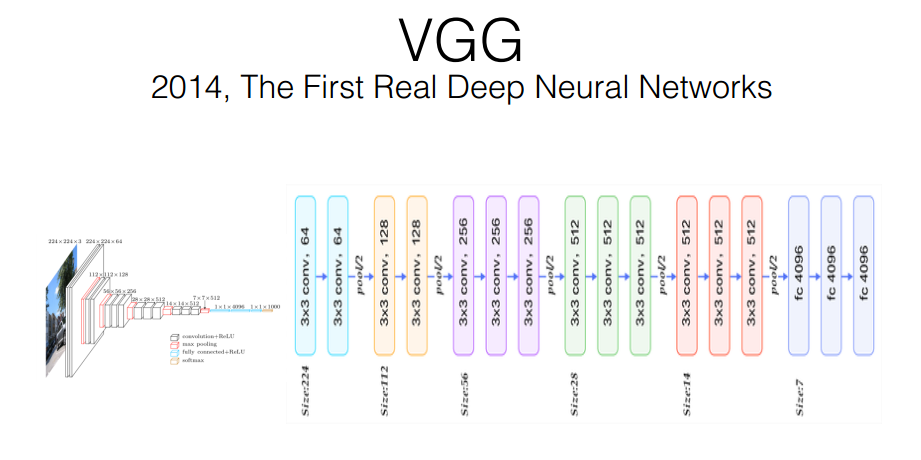
##### 2014, The First Real Deep Neural Networks
VGG是Oxford的Visual Geometry Group的组提出的.主要工作是证明了增加网络的深度能够在一定程度上影响网络最终的性能。VGG有两种结构，分别是VGG16和VGG19，两者并没有本质上的区别，只是网络深度不一样。

VGG16相比AlexNet的一个改进是采用连续的几个3x3的卷积核代替AlexNet中的较大卷积核（11x11，7x7，5x5）。采用堆积的小卷积核是优于采用大的卷积核，因为多层非线性层可以增加网络深度来保证学习更复杂的模式，而且代价还比较小（参数更少）。

网络结构
![img](https://pic4.zhimg.com/80/v2-ea924e733676e0da534f677a97c98653_hd.jpg)

VGG优点
- VGGNet的结构非常简洁，整个网络都使用了同样大小的卷积核尺寸（3x3）和最大池化尺寸（2x2）。
- 几个小滤波器（3x3）卷积层的组合比一个大滤波器（5x5或7x7）卷积层好：
- 验证了通过不断加深网络结构可以提升性能。

VGG缺点
- VGG耗费更多计算资源，并且使用了更多的参数（这里不是3x3卷积的锅），导致更多的内存占用（140M）。其中绝大多数的参数都是来自于第一个全连接层。VGG可是有3个全连接层啊！
PS：有的文章称：发现这些全连接层即使被去除，对于性能也没有什么影响，这样就显著降低了参数数量。

-----------------------------------------------------------------------------------------

### 4. GoogLeNet （2014）

#### Incepetion V1

这是GoogLeNet的最早版本，出现在2014年的《Going deeper with convolutions》。

##### Motivation
深度学习以及神经网络快速发展，人们不再只关注更给力的硬件、更大的数据集、更大的模型，而是更在意新的idea、新的算法以及模型的改进。

一般来说，提升网络性能最直接的办法就是增加网络深度和宽度，这也就意味着巨量的参数。但是，巨量参数容易产生过拟合也会大大增加计算量。

文章认为解决上述两个缺点的根本方法是将全连接甚至一般的卷积都转化为稀疏连接。所以，现在的问题是有没有一种方法，既能保持网络结构的稀疏性，又能利用密集矩阵的高计算性能。大量的文献表明可以将稀疏矩阵聚类为较为密集的子矩阵来提高计算性能，据此论文提出了名为**Inception** 的结构来实现此目的。

####  网络结构
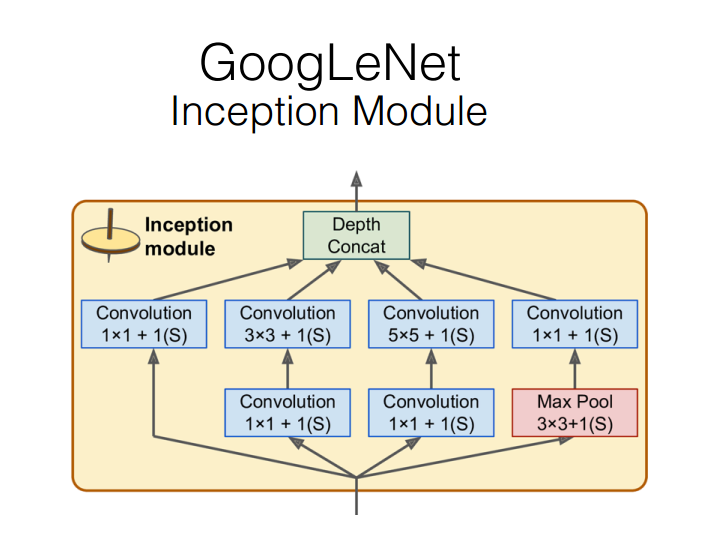
对上图做如下说明：

1 . 显然GoogLeNet采用了模块化的结构，方便增添和修改；

2 . 网络最后采用了average pooling来代替全连接层，想法来自NIN,事实证明可以将TOP1 accuracy提高0.6%。但是，实际在最后还是加了一个全连接层，主要是为了方便以后大家finetune；

3 . 虽然移除了全连接，但是网络中依然使用了Dropout ;

4 . 为了避免梯度消失，网络额外增加了2个辅助的softmax用于向前传导梯度。文章中说这两个辅助的分类器的loss应该加一个衰减系数，但看caffe中的model也没有加任何衰减。此外，实际测试的时候，这两个额外的softmax会被去掉。

#### GoogLeNet Inception V2

《Rethinking the Inception Architecture for Computer Vision》http://arxiv.org/abs/1512.00567

-----------------------------------------------------------------------------------------

### 5. ResNet （2015）

2015,ImageNet比赛classification任务上获得第一名

随着网络的加深，出现了训练集准确率下降的现象，我们可以确定这不是由于Overfit过拟合造成的(过拟合的情况训练集应该准确率很高)；所以作者针对这个问题提出了一种全新的网络，叫深度残差网络，它允许网络尽可能的加深，其中引入了全新的结构<font color=black>**Shortcut Connection**</font>


#### 网络结构
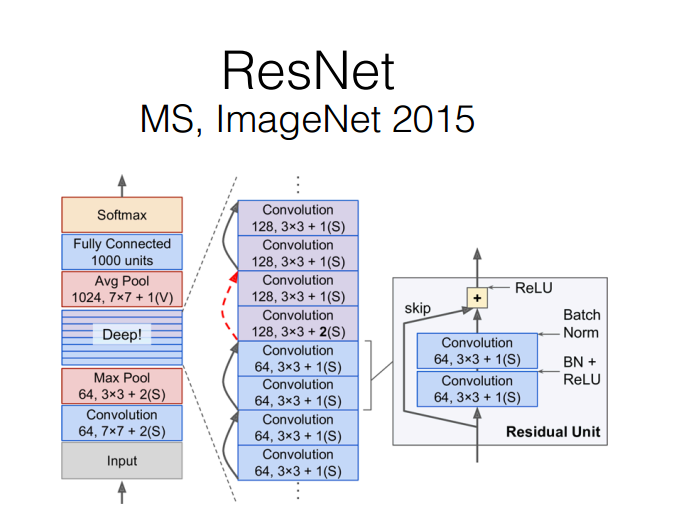